In [1]:
# importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
import datetime
from datetime import date
import operator 
import os
import wget
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline


## DATA COLLECTION

In [2]:
# DATA at these urls are updated on daily basis
# data for confirmed cases
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,56153,56177,56192,56226,56254,56290,56294,56322,56384,56454
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,121544,121847,122295,122767,123216,123641,124134,124419,124723,125157
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,116255,116349,116438,116543,116657,116750,116836,116946,117061,117192
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,11545,11591,11638,11687,11732,11809,11850,11888,11944,12010
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,21757,21774,21836,21914,21961,22031,22063,22132,22182,22311


In [4]:
    
deaths_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [5]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2464,2466,2466,2467,2467,2469,2470,2472,2476,2484
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2145,2156,2171,2184,2192,2204,2210,2216,2227,2235
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3061,3066,3069,3071,3074,3077,3080,3084,3089,3093
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,113,113,114,114,114,115,115,115,115,115
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,530,530,532,532,532,533,533,534,536,537


In [6]:
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [7]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,49743,49752,49802,49937,49994,49994,50013,50666,51473,51550
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,85846,86497,87193,87760,88349,88899,89456,90024,90617,91271
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,80887,80981,81065,81065,81160,81242,81316,81349,81442,81538
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,11014,11050,11082,11111,11149,11172,11204,11244,11276,11315
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,20090,20099,20172,20190,20250,20269,20289,20380,20446,20493


In [8]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-15-2020.csv')

In [9]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-16 04:44:59,34.223334,-82.461707,165,1,0,164.0,"Abbeville, South Carolina, US",672.728014,0.606061
1,22001.0,Acadia,Louisiana,US,2020-07-16 04:44:59,30.295065,-92.414197,1510,46,0,1464.0,"Acadia, Louisiana, US",2433.717463,3.046358
2,51001.0,Accomack,Virginia,US,2020-07-16 04:44:59,37.767072,-75.632346,1045,14,0,1031.0,"Accomack, Virginia, US",3233.692289,1.339713
3,16001.0,Ada,Idaho,US,2020-07-16 04:44:59,43.452658,-116.241552,4836,28,0,4808.0,"Ada, Idaho, US",1004.179930,0.578991
4,19001.0,Adair,Iowa,US,2020-07-16 04:44:59,41.330756,-94.471059,17,0,0,17.0,"Adair, Iowa, US",237.695749,0.000000


## Global Data Analysis

In [10]:
unique_countries =  (latest_data['Country_Region'].unique()).tolist()
unique_countries

['US',
 'Italy',
 'Brazil',
 'Russia',
 'Mexico',
 'Japan',
 'Canada',
 'Colombia',
 'Peru',
 'Spain',
 'India',
 'United Kingdom',
 'China',
 'Chile',
 'Netherlands',
 'Australia',
 'Pakistan',
 'Germany',
 'Sweden',
 'Ukraine',
 'Denmark',
 'France',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Et

In [11]:
confirmed_by_country = []
death_by_country = [] 
active_by_country = []
recovery_by_country = []
mortality_rate_by_country = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        confirmed_by_country.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, confirmed_by_country), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    confirmed_by_country[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    death_by_country.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    recovery_by_country.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    active_by_country.append(confirmed_by_country[i] - death_by_country[i] - recovery_by_country[i])
    mortality_rate_by_country.append(death_by_country[i]/confirmed_by_country[i])

In [12]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': confirmed_by_country,
                          'Number of Deaths': death_by_country, 'Number of Recoveries' : recovery_by_country, 
                          'Number of Active Cases' : active_by_country,
                          'Mortality Rate': mortality_rate_by_country})
# number of cases per country/region

country_df.style.background_gradient(cmap='Reds')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Mortality Rate
0,US,3512816,137403,1075882,2299531,0.039115
1,Brazil,1966748,75366,1350098,541284,0.038320
2,India,968857,24914,612768,331175,0.025715
3,Russia,745197,11753,522375,211069,0.015772
4,Peru,337751,12417,226400,98934,0.036764
5,Chile,321205,7186,292085,21934,0.022372
6,Mexico,317635,36906,252368,28361,0.116190
7,South Africa,311049,4453,160693,145903,0.014316
8,United Kingdom,293469,45138,1386,246945,0.153808
9,Iran,264561,13410,227561,23590,0.050688


In [13]:
unique_provinces =  (latest_data['Province_State'].unique()).tolist()

In [14]:
confirmed_by_province = []
country_by_province = [] 
death_by_province = [] 
recovery_by_province = []
mortality_rate_by_province = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        confirmed_by_province.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, confirmed_by_province), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    confirmed_by_province[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    country_by_province.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    death_by_province.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    recovery_by_province.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    mortality_rate_by_province.append(death_by_province[i]/confirmed_by_province[i])

In [15]:
# number of cases per province/state/city
province_df = pd.DataFrame({'Province/State Name': unique_provinces, 'Country': country_by_province, 'Number of Confirmed Cases': confirmed_by_province,
                          'Number of Deaths': death_by_province, 'Number of Recoveries' : recovery_by_province,
                          'Mortality Rate': mortality_rate_by_province})
# number of cases per country/region

province_df.style.background_gradient(cmap='Greens')

,Province/State Name,Country,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Mortality Rate
0,New York,US,404006,32427,0,0.080264
1,Sao Paulo,Brazil,393176,18640,246941,0.047409
2,California,US,362293,7375,0,0.020356
3,Florida,US,301810,4521,0,0.014980
4,Texas,US,292477,3745,0,0.012804
5,Maharashtra,India,275640,10928,152613,0.039646
6,England,United Kingdom,250885,40462,0,0.161277
7,Metropolitana,Chile,241345,5957,224418,0.024683
8,Moscow,Russia,231270,4234,167810,0.018308
9,Lima,Peru,181131,5763,0,0.031817


In [16]:
# Dealing with missing values
nan_indices = [] 

# handle nan if there is any, it is usually a float: float('nan')
for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = (unique_provinces)
confirmed_by_province = (confirmed_by_province)

for i in nan_indices:
    unique_provinces.pop(i)
    confirmed_by_province.pop(i)

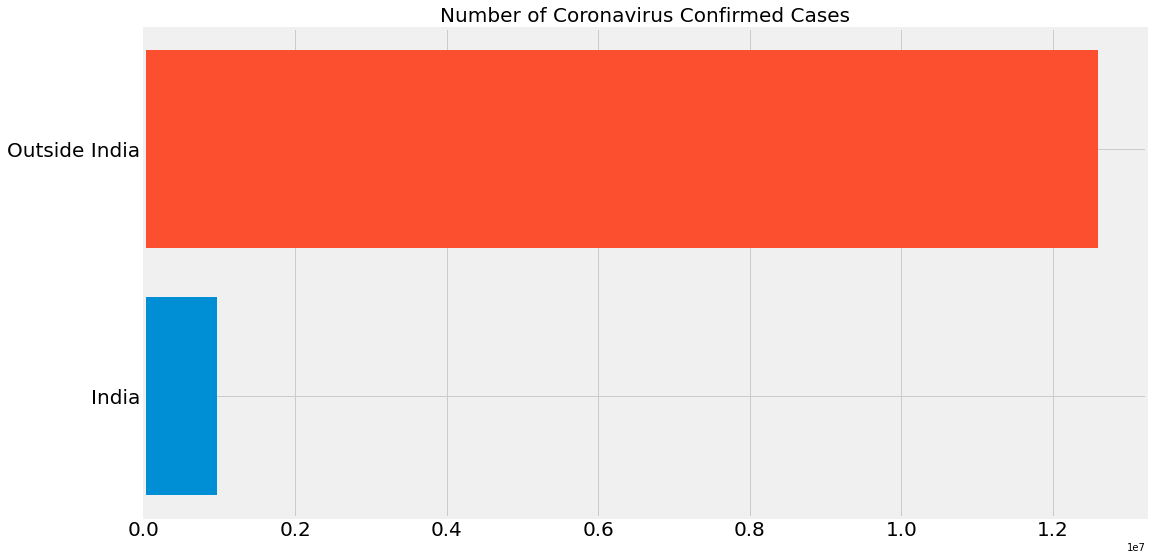

In [17]:
India_confirmed = latest_data[latest_data['Country_Region']=='India']['Confirmed'].sum()
outside_India_confirmed = np.sum(confirmed_by_country) - India_confirmed
plt.figure(figsize=(16, 9))
plt.barh('India', India_confirmed)
plt.barh('Outside India', outside_India_confirmed)
plt.title('Number of Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [18]:
print('Outside India: {} cases'.format(outside_India_confirmed))
print('India: {} cases'.format(India_confirmed))
print('Total: {} cases'.format(India_confirmed+outside_India_confirmed))

Outside India: 12602760 cases
India: 968857 cases
Total: 13571617 cases


In [19]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(confirmed_by_country[10:])

for i in range(len(confirmed_by_country[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(confirmed_by_country[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [20]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(16, 9))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

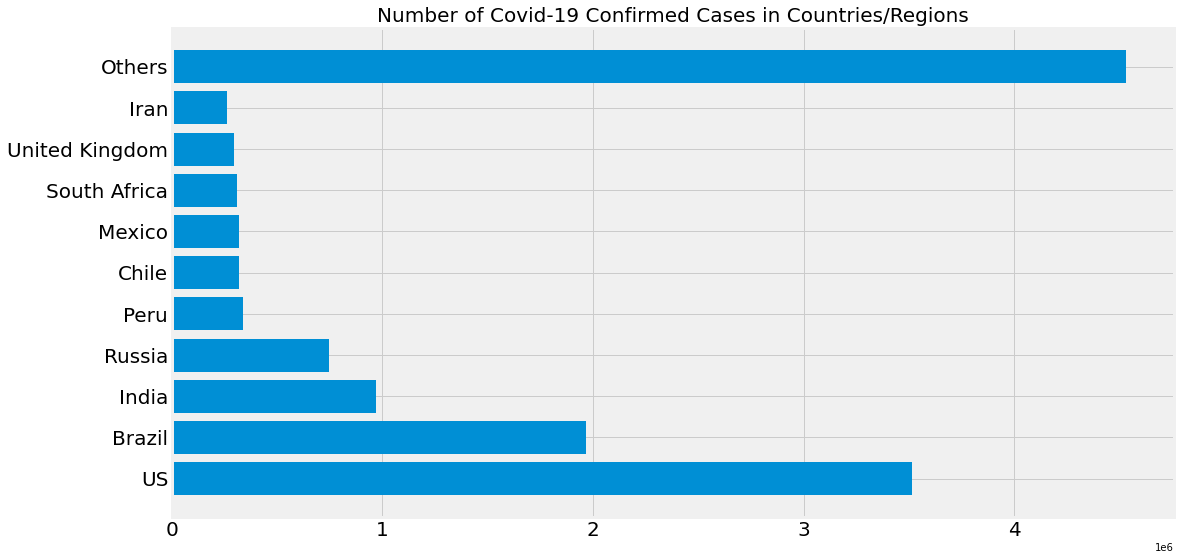

In [21]:
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, 'Number of Covid-19 Confirmed Cases in Countries/Regions')

In [22]:
def plot_pie_charts(x, y, title):
    plt.figure(figsize=(15,15))
    plt.title(title, size=20)
    plt.pie(y)
    plt.legend(x, loc='best', fontsize=15)
    plt.show()

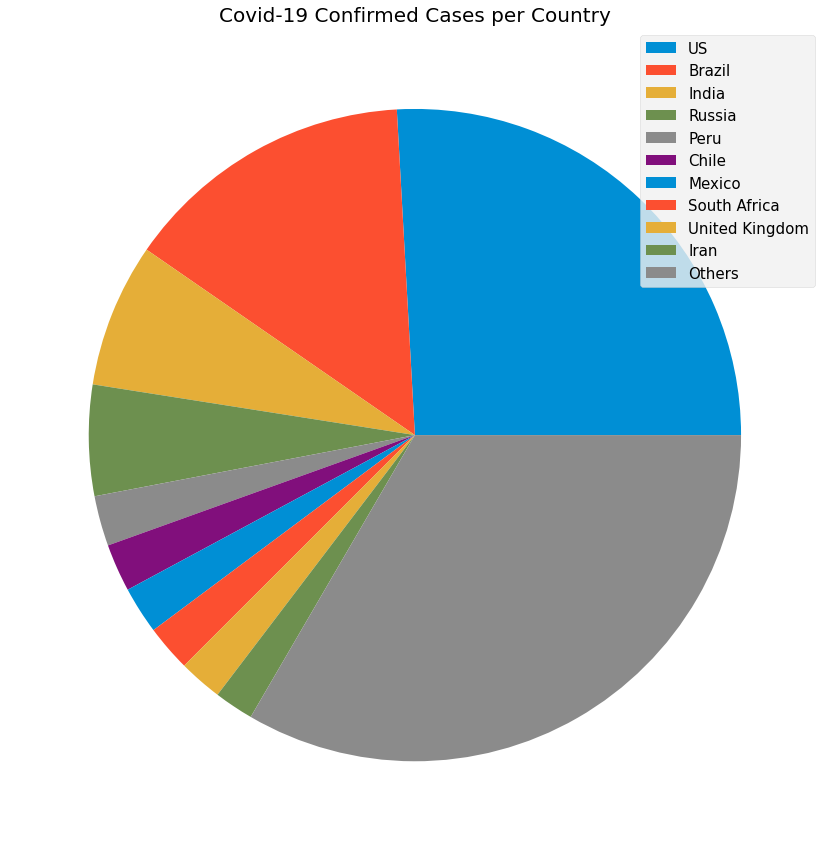

In [23]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Covid-19 Confirmed Cases per Country')

### DATA PRE PROCESSING FOR FORECASTING

In [24]:
## attributes
# Fetching all the columns from confirmed dataset
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '3/22/21', '3/23/21', '3/24/21', '3/25/21', '3/26/21', '3/27/21',
       '3/28/21', '3/29/21', '3/30/21', '3/31/21'],
      dtype='object', length=439)

In [25]:
# Extracting the date columns
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [26]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21
0,0,0,0,0,0,0,0,0,0,0,...,56153,56177,56192,56226,56254,56290,56294,56322,56384,56454
1,0,0,0,0,0,0,0,0,0,0,...,121544,121847,122295,122767,123216,123641,124134,124419,124723,125157
2,0,0,0,0,0,0,0,0,0,0,...,116255,116349,116438,116543,116657,116750,116836,116946,117061,117192
3,0,0,0,0,0,0,0,0,0,0,...,11545,11591,11638,11687,11732,11809,11850,11888,11944,12010
4,0,0,0,0,0,0,0,0,0,0,...,21757,21774,21836,21914,21961,22031,22063,22132,22182,22311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,0,2,2,2,2,2,2,2,2,2,...,2575,2575,2576,2579,2586,2586,2591,2594,2594,2603
270,0,0,0,0,0,0,0,0,0,0,...,225976,228044,230076,232038,233549,234748,236462,238248,240065,242353
271,0,0,0,0,0,0,0,0,0,0,...,3516,3612,3703,3816,3900,3969,4033,4115,4247,4357
272,0,0,0,0,0,0,0,0,0,0,...,86535,86779,86993,87318,87583,87583,87872,88012,88199,88418


In [27]:
# Range of date
dates = confirmed.keys()

# Summary
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

# Confirmed


india_cases = []

# Death

india_deaths = []

# Recovered

india_recoveries = []

In [28]:
# Fill with the dataset
for i in dates:
    
   
    
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    
   
    india_deaths.append(deaths_reported[deaths_reported['Country/Region']=='India'][i].sum())
  
   
    india_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())



## Active Cases Forecasting

In [29]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

In [30]:
#confirmed cases
india_daily_increase = daily_increase(india_cases)

In [31]:
india_daily_increase

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 23,
 2,
 1,
 3,
 5,
 4,
 13,
 6,
 11,
 9,
 20,
 11,
 6,
 23,
 14,
 38,
 50,
 86,
 66,
 103,
 37,
 121,
 70,
 160,
 100,
 37,
 227,
 146,
 601,
 545,
 24,
 515,
 506,
 1190,
 533,
 605,
 809,
 873,
 848,
 759,
 1248,
 1034,
 835,
 1108,
 922,
 1370,
 1893,
 924,
 1541,
 1290,
 1707,
 1453,
 1753,
 1607,
 1561,
 1873,
 1738,
 1801,
 2394,
 2442,
 2806,
 3932,
 2963,
 3587,
 3364,
 3344,
 3113,
 4353,
 3607,
 3524,
 3763,
 3942,
 3787,
 4864,
 5050,
 4630,
 6147,
 5553,
 6198,
 6568,
 6629,
 7113,
 6414,
 5843,
 7293,
 7300,
 8105,
 8336,
 8782,
 7761,
 8821,
 9633,
 9889,
 9471,
 10438,
 10864,
 8442,
 10218,
 10459,
 10930,
 11458,
 11929,
 11502,
 10667,
 10974,
 12881,
 13586,
 14516,
 15403,
 14831,
 14933,
 15968,
 16922,
 17296,
 18552,
 19906,
 19459,
 18522,
 18641,
 19160,
 20903,
 22771,
 24850,
 24248,
 22251,


In [32]:
# Dates pre processing
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)

days_in_future = 0
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)

In [33]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [34]:
future_forecast_dates

['01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020',
 '03/26/2020',
 '03/27/2020',
 '03/28/20

In [35]:
len(future_forecast_dates)

435

In [36]:
dataCovid= pd.DataFrame({ 'Dates': future_forecast_dates , 'Daily Increase':india_daily_increase })

In [37]:
dataCovid

,Dates,Daily Increase
0,01/22/2020,0
1,01/23/2020,0
2,01/24/2020,0
3,01/25/2020,0
4,01/26/2020,0
...,...,...
430,03/27/2021,62714
431,03/28/2021,68020
432,03/29/2021,56211
433,03/30/2021,53480


In [38]:
from pmdarima import auto_arima

In [39]:
train = dataCovid[:int(0.7*(len(dataCovid)))]
valid = dataCovid[int(0.7*(len(dataCovid))):]

In [40]:
#preprocessing (since arima takes univariate series as input)
train.drop('Dates',axis=1,inplace=True)
valid.drop('Dates',axis=1,inplace=True)


In [41]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5863.187, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5891.433, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5889.998, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5885.313, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5889.873, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5861.974, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5858.257, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=5862.777, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5873.308, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5829.201, Time=0.44 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=5823.369, Time=0.16 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=5837.968, Time=0.14 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=5832.207, Time=0.37 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : 

In [42]:
def ARIMAmodel(series, order, days = 21):
    # Fitting and forecast the series
    train = [x for x in series]
    model = ARIMA(train, order = order)
    model_fit = model.fit(disp=0)
    forecast, err, ci = model_fit.forecast(steps = days, alpha = 0.05)
    start_day = date.today() + datetime.timedelta(days = 1)
    predictions_df = pd.DataFrame({'Forecast':forecast.round()}, index=pd.date_range(start = start_day, periods=days, freq='D'))
    return predictions_df, ci

def plot_results(series, df_forecast, ci, label):
    start_covid_day = date(2020, 1, 22)
    series = pd.DataFrame({'Real data':series}, index=pd.date_range(start = start_covid_day, periods=series.shape[0], freq='D'))
    ax = series.plot(label = 'Real Data', figsize = (20, 15))
    df_forecast.plot(ax = ax, label='Forecast', color = 'r')
    ax.fill_between(df_forecast.index,
                    ci[:,0],
                    ci[:,1], color='b', alpha=.25)
    ax.set_xlabel('Days')
    ax.set_ylabel(label)
    ax.set_title(label + ' Forecasting')
    plt.legend()
    #plt.savefig('plots/' + label + '.png')

In [43]:
new_positives = dataCovid['Daily Increase'].values

In [44]:
order = {
    'new_positives': (2, 1, 5),
    
}

In [45]:
new_positives_today=new_positives[-1]

In [46]:
new_positives_today

72330

In [47]:
# Forecasting with ARIMA models
new_positives_pred, new_positives_ci = ARIMAmodel(new_positives, order['new_positives'])

In [48]:
new_positives_pred

,Forecast
2021-04-03,68760.0
2021-04-04,67844.0
2021-04-05,70424.0
2021-04-06,67151.0
2021-04-07,64168.0
2021-04-08,63829.0
2021-04-09,66431.0
2021-04-10,70049.0
2021-04-11,72047.0
2021-04-12,71078.0


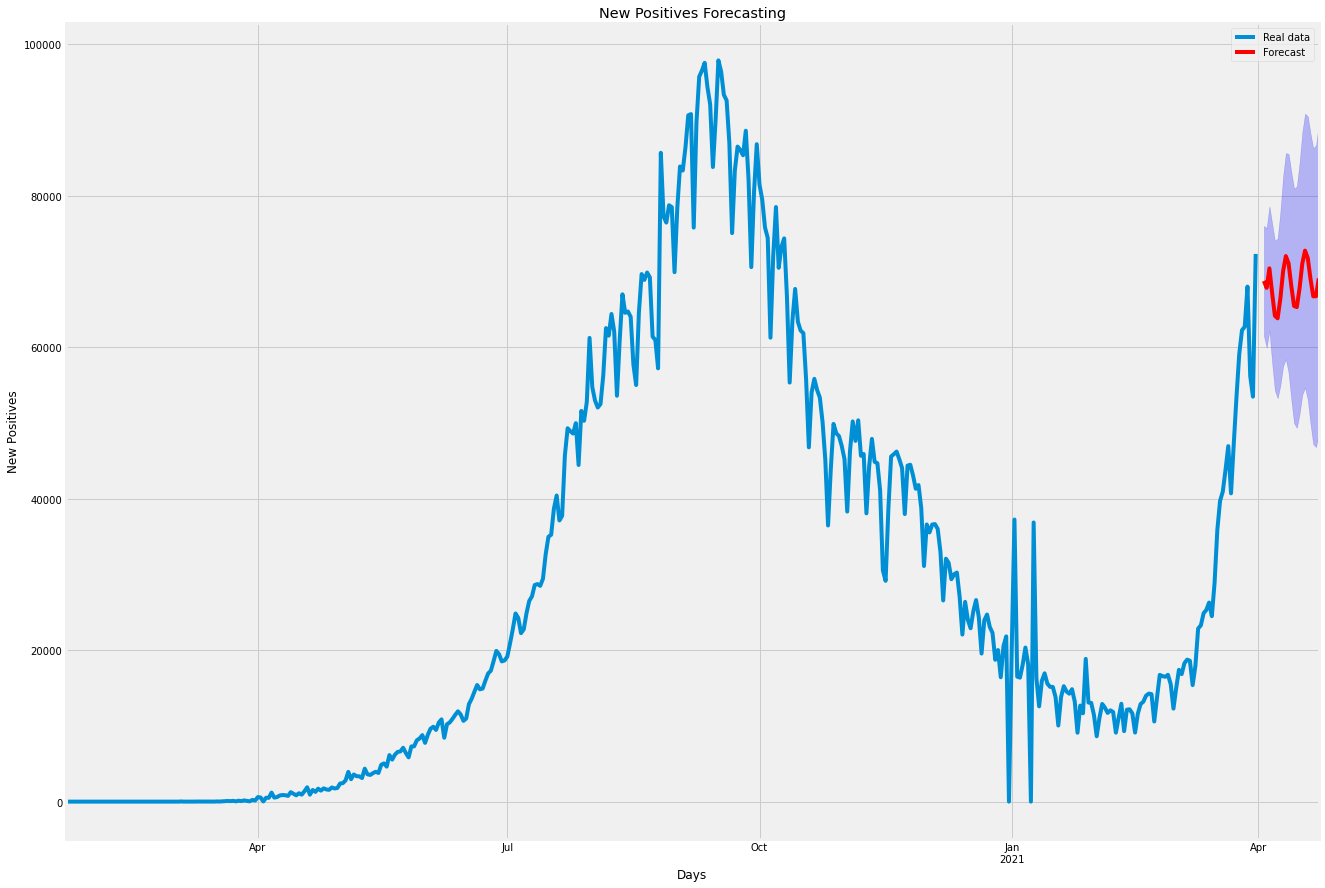

In [49]:
# Plot Results ; The blue plot gives graphs of new postive cases till now ,
# while red plot on graph shows the forecast for next 21 days
plot_results(new_positives, new_positives_pred, new_positives_ci, 'New Positives')
 

In [50]:
casesY=[]
datesX=[]
list1 = new_positives_pred.iloc[: ,0]
for i in range(0,21):
    casesY.append(list1[i])
    datesX.append((date.today()+ datetime.timedelta(days=i)).strftime('%m/%d/%Y'))


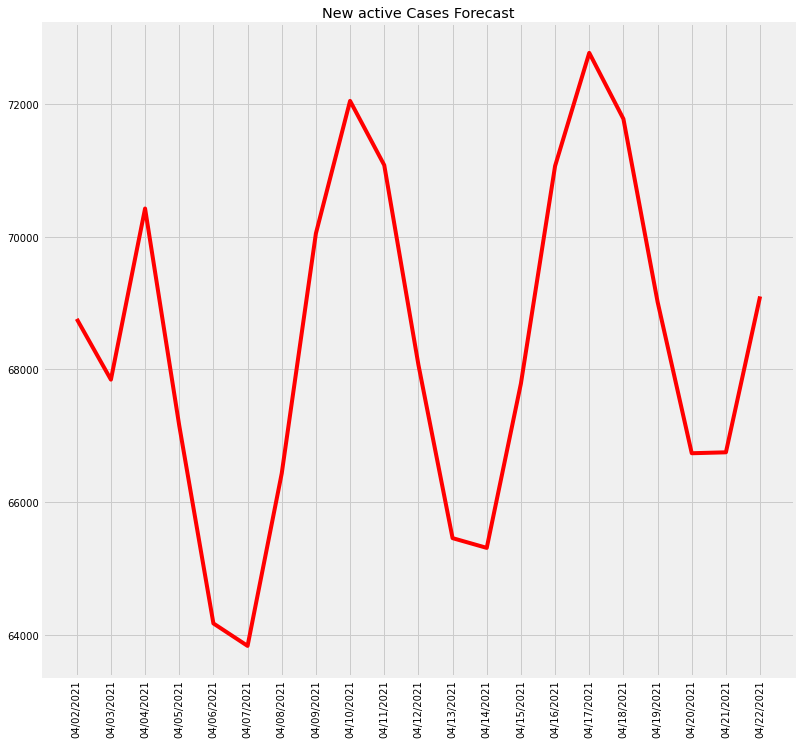

<Figure size 1584x1584 with 0 Axes>

In [51]:
# Plot Results for forecasted dates only (detailed) 
plt.figure(figsize=(12,12))
plt.plot(datesX,casesY,color='red')
plt.title('New active Cases Forecast')
plt.xticks(rotation=90)
plt.figure(figsize=(22,22))
plt.show()

## Death Cases Forecasting

In [52]:
india_daily_deaths =  daily_increase(india_deaths)
india_daily_deaths

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 -1,
 3,
 3,
 0,
 2,
 8,
 0,
 4,
 3,
 5,
 3,
 23,
 14,
 0,
 14,
 13,
 37,
 14,
 28,
 48,
 20,
 42,
 43,
 27,
 35,
 12,
 43,
 38,
 35,
 38,
 33,
 53,
 36,
 40,
 59,
 45,
 56,
 58,
 69,
 71,
 75,
 69,
 100,
 68,
 175,
 127,
 92,
 104,
 96,
 116,
 111,
 82,
 121,
 136,
 98,
 104,
 118,
 154,
 131,
 146,
 132,
 150,
 142,
 142,
 156,
 148,
 172,
 190,
 177,
 269,
 205,
 223,
 200,
 221,
 259,
 275,
 286,
 297,
 261,
 266,
 277,
 352,
 396,
 386,
 311,
 325,
 380,
 2003,
 334,
 336,
 375,
 306,
 445,
 312,
 465,
 418,
 407,
 384,
 410,
 380,
 418,
 507,
 434,
 379,
 442,
 613,
 425,
 466,
 483,
 487,
 475,
 519,
 550,
 501,
 553,
 582,
 605,
 688,
 671,
 543,
 681,
 585,
 650,
 1129,
 740,
 757,
 702,
 711,
 637,
 785,
 762,
 763,
 793,
 853,
 771,
 803,
 857

In [53]:
dates = confirmed.keys()
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
days_in_future = 0
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [54]:
len(future_forecast_dates)

435

In [55]:
dataCovid = pd.DataFrame({ 'Dates': future_forecast_dates , 'Daily Deaths':india_daily_deaths})
dataCovid

,Dates,Daily Deaths
0,01/22/2020,0
1,01/23/2020,0
2,01/24/2020,0
3,01/25/2020,0
4,01/26/2020,0
...,...,...
430,03/27/2021,312
431,03/28/2021,291
432,03/29/2021,271
433,03/30/2021,354


In [56]:
from pmdarima import auto_arima
train = dataCovid[:int(0.7*(len(dataCovid)))]
valid = dataCovid[int(0.7*(len(dataCovid))):]
#preprocessing (since arima takes univariate series as input)
train.drop('Dates',axis=1,inplace=True)
valid.drop('Dates',axis=1,inplace=True)

In [57]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3795.827, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3919.907, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3852.547, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3789.882, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3917.951, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3791.826, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3791.819, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3793.453, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3788.866, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3790.818, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3790.812, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3850.666, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3792.455, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.485 seconds


In [58]:
def ARIMAmodel(series, order, days = 21):
    # Fitting and forecast the series
    train = [x for x in series]
    model = ARIMA(train, order = order)
    model_fit = model.fit(disp=0)
    forecast, err, ci = model_fit.forecast(steps = days, alpha = 0.05)
    start_day = date.today() + datetime.timedelta(days = 1)
    predictions_df = pd.DataFrame({'Forecast':forecast.round()}, index=pd.date_range(start = start_day, periods=days, freq='D'))
    return predictions_df, ci

def plot_results(series, df_forecast, ci, label):
    start_covid_day = date(2020, 1, 22)
    series = pd.DataFrame({'Real data':series}, index=pd.date_range(start = start_covid_day, periods=series.shape[0], freq='D'))
    ax = series.plot(label = 'Real Data', figsize = (20, 15))
    df_forecast.plot(ax = ax, label='Forecast', color = 'r')
    ax.fill_between(df_forecast.index,
                    ci[:,0],
                    ci[:,1], color='b', alpha=.25)
    ax.set_xlabel('Days')
    ax.set_ylabel(label)
    ax.set_title(label + ' Forecasting')
    plt.legend()
    #plt.savefig('plots/' + label + '.png')

In [59]:
new_deaths = dataCovid['Daily Deaths'].values
order = {
    'new_deaths': (0, 1, 1),
    
}
new_deaths_today=new_deaths[-1]

In [60]:
# Forecasting with ARIMA models
new_deaths_pred, new_deaths_ci = ARIMAmodel(new_deaths, order['new_deaths'])

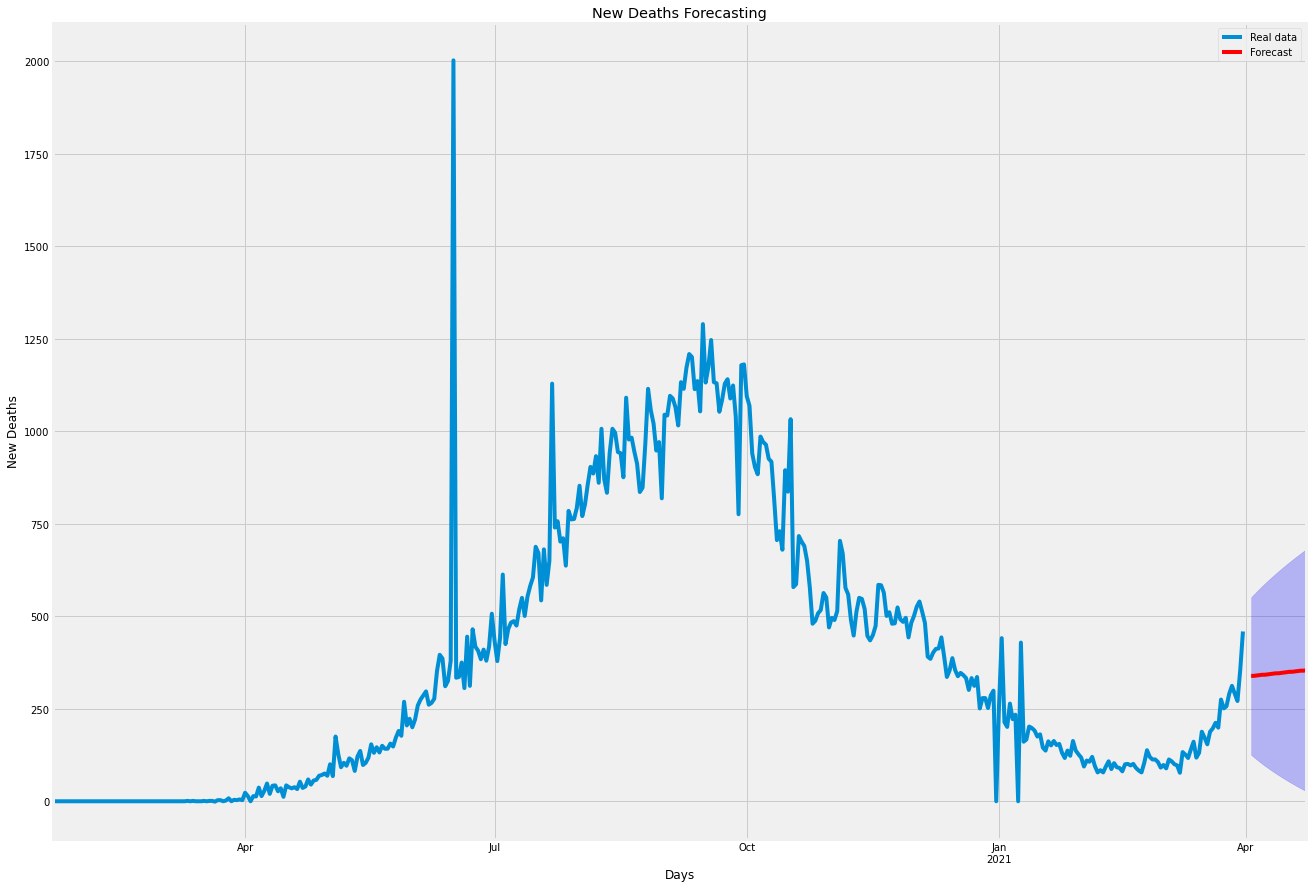

In [61]:
# Plot Results ; The blue plot gives graphs of new death cases till now ,
# while red plot on graph shows the forecast for next 21 days
plot_results(new_deaths, new_deaths_pred, new_deaths_ci, 'New Deaths')

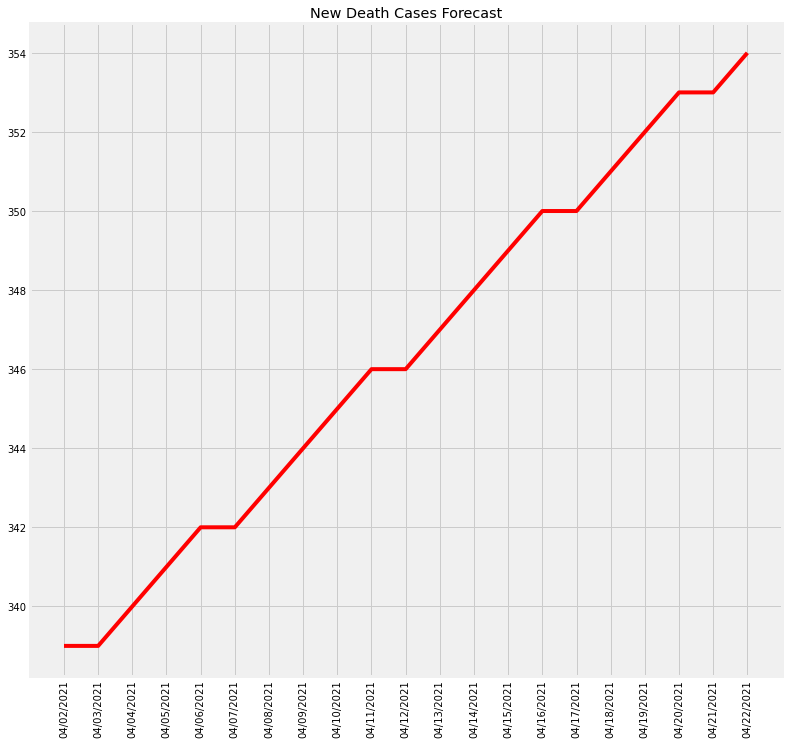

In [62]:
# Plot Results for forecasted dates only; zoomed in view
cases=[]
dates=[]
list1 = new_deaths_pred.iloc[: ,0]
for i in range(0,21):
    cases.append(list1[i])
    dates.append((date.today()+ datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
    
plt.figure(figsize=(12,12))    
plt.plot(dates,cases,color='red')
plt.title('New Death Cases Forecast')
plt.xticks(rotation=90)
plt.show()

## Recovered Cases Forecasting

In [63]:
india_daily_recoveries= daily_increase(india_recoveries)
india_daily_recoveries

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 9,
 0,
 1,
 0,
 1,
 5,
 3,
 4,
 0,
 13,
 3,
 2,
 28,
 11,
 11,
 7,
 21,
 25,
 43,
 1,
 37,
 0,
 146,
 46,
 85,
 114,
 154,
 195,
 111,
 101,
 178,
 73,
 336,
 273,
 422,
 391,
 419,
 702,
 395,
 642,
 486,
 441,
 584,
 614,
 610,
 690,
 631,
 939,
 812,
 956,
 1072,
 1295,
 1189,
 1445,
 1111,
 1414,
 1668,
 1580,
 1871,
 1980,
 1569,
 2289,
 3966,
 2571,
 2438,
 3076,
 3113,
 3131,
 3271,
 2561,
 3307,
 3014,
 3571,
 3472,
 3171,
 11707,
 4309,
 4916,
 3902,
 4531,
 3786,
 4379,
 4783,
 5462,
 5153,
 5247,
 5575,
 536,
 11989,
 7135,
 8049,
 7419,
 10215,
 6922,
 7390,
 10386,
 9120,
 13897,
 9468,
 10994,
 10495,
 13012,
 13940,
 10244,
 13832,
 12010,
 13099,
 13090,
 11948,
 20032,
 14335,
 14856,
 15350,
 15501,
 16897,
 19547,
 19135,
 19873,
 19232,
 18853,
 17989,
 205

In [64]:
dates = confirmed.keys() #range of date in data
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
days_in_future = 0
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [65]:
len(future_forecast_dates)

435

In [66]:
dataCovid = pd.DataFrame({ 'Dates': future_forecast_dates , 'Daily Recoveries':india_daily_recoveries})
dataCovid

,Dates,Daily Recoveries
0,01/22/2020,0
1,01/23/2020,0
2,01/24/2020,0
3,01/25/2020,0
4,01/26/2020,0
...,...,...
430,03/27/2021,28739
431,03/28/2021,32231
432,03/29/2021,37028
433,03/30/2021,41280


In [67]:
from pmdarima import auto_arima
train = dataCovid[:int(0.7*(len(dataCovid)))]
valid = dataCovid[int(0.7*(len(dataCovid))):]
#preprocessing (since arima takes univariate series as input)
train.drop('Dates',axis=1,inplace=True)
valid.drop('Dates',axis=1,inplace=True)

In [68]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5801.073, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5887.632, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5816.917, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5808.416, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5886.147, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5802.292, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5803.104, Time=0.06 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5792.364, Time=0.29 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5803.777, Time=0.22 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=5783.908, Time=0.62 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=5803.264, Time=0.18 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=5774.410, Time=0.46 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=5776.557, Time=0.20 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=5776.064, Time=0.36 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept

In [69]:
def ARIMAmodel(series, order, days = 21):
    # Fitting and forecast the series
    train = [x for x in series]
    model = ARIMA(train, order = order)
    model_fit = model.fit(disp=0)
    forecast, err, ci = model_fit.forecast(steps = days, alpha = 0.05)
    start_day = date.today() + datetime.timedelta(days = 1)
    predictions_df = pd.DataFrame({'Forecast':forecast.round()}, index=pd.date_range(start = start_day, periods=days, freq='D'))
    return predictions_df, ci

def plot_results(series, df_forecast, ci, label):
    start_covid_day = date(2020, 1, 22)
    series = pd.DataFrame({'Real data':series}, index=pd.date_range(start = start_covid_day, periods=series.shape[0], freq='D'))
    ax = series.plot(label = 'Real Data', figsize = (20, 15))
    df_forecast.plot(ax = ax, label='Forecast', color = 'r')
    ax.fill_between(df_forecast.index,
                    ci[:,0],
                    ci[:,1], color='b', alpha=.25)
    ax.set_xlabel('Days')
    ax.set_ylabel(label)
    ax.set_title(label + ' Forecasting')
    plt.legend()
    #plt.savefig('plots/' + label + '.png')

In [70]:
new_recoveries = dataCovid['Daily Recoveries'].values
order = {
    'new_recoveries': (1, 1, 2),
    
}
new_recoveries_today=new_recoveries[-1]

In [71]:
# Forecasting with ARIMA models
new_recoveries_pred, new_recoveries_ci = ARIMAmodel(new_recoveries, order['new_recoveries'])

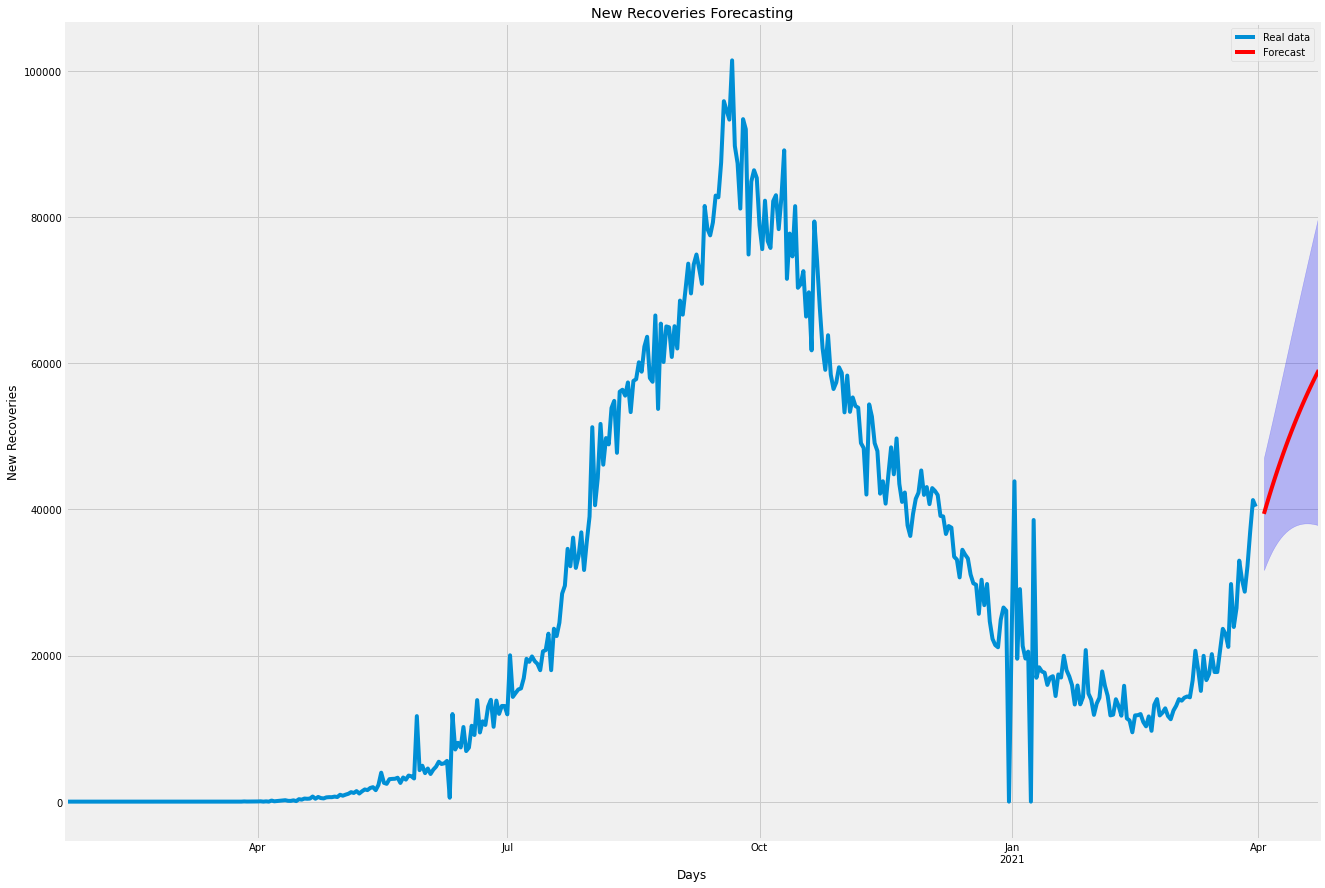

In [72]:
# Plot Results ; The blue plot gives graphs of new death cases till now ,
# while red plot on graph shows the forecast for next 21 days
plot_results(new_recoveries, new_recoveries_pred, new_recoveries_ci, 'New Recoveries')

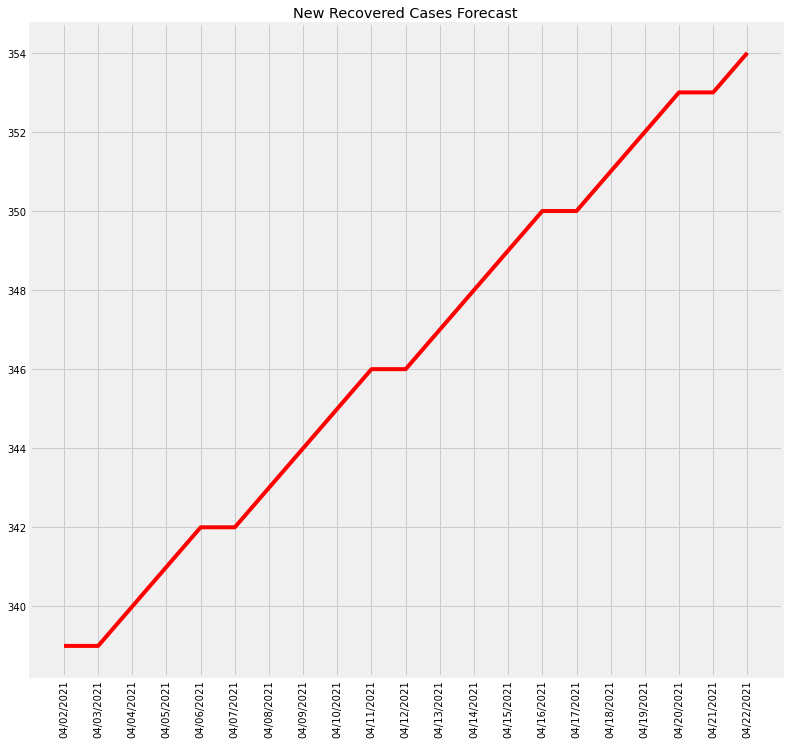

In [73]:
# Plot Results for forecasted dates only;  zoomed in view
cases=[]
dates=[]
list1 = new_deaths_pred.iloc[: ,0]
for i in range(0,21):
    cases.append(list1[i])
    dates.append((date.today()+ datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
    
plt.figure(figsize=(12,12))    
plt.plot(dates,cases,color='red')
plt.title('New Recovered Cases Forecast')
plt.xticks(rotation=90)
plt.show()